#ENSEMBLE LEARNING

1.Can we use Bagging for regression problems?

ans-

    Yes.
    Bagging can be applied to regression and classification.
    In regression, common base estimators:

    DecisionTreeRegressor

    KNeighborsRegressor

    Bagging reduces variance and improves stability.

2.What is the difference between multiple model training and single model training?  

ans-

  The difference between multiple model training and single model training as follows

    Single Model
    Uses one algorithm
    High risks of overfitting
    Low computational cost
    Limited accuracy

    Multiple Models (Ensemble)
	  Trains many models
	  Reduces overfitting (Bagging)
	  Higher computational cost
	  Higher accuracy & robustness

3.Explain the concept of feature randomness in Random Forest?

ans-

    Random Forest introduces feature randomness by selecting a random subset of features at each split.
    This reduces correlation among trees and improves generalization.    

4.What is OOB (Out-of-Bag) Score?

ans-


    In bagging, each tree is trained on a bootstrap sample (about 63% of data).
    The remaining 37% is Out-of-Bag data.
    OOB score = accuracy evaluated on this leftover data.
    It acts like built-in cross-validation.    


5.How can you measure the importance of features in a Random Forest model?

ans-


    Two main methods:

    Gini Importance / Mean Decrease in Impurity

    Permutation Importance (more accurate)

6.Explain the working principle of a Bagging Classifier.

ans-

    Steps:

    Create many bootstrap samples.

    Train a base model on each sample.

    Combine predictions using majority vote (classification).  

7.How to evaluate Bagging Classifier performance?

ans-

    Accuracy

    Confusion Matrix

    Precision, Recall, F1

    ROC-AUC

    Cross-validation

    OOB Score

8.How Bagging Regressor works?

ans-

    Same as classifier but uses:

    Averaging of predictions instead of voting.

9.What is the main advantage of ensemble techniques?

ans-


    Higher accuracy

    Reduced variance

    More robust than single model

10.What is the main challenge of ensemble methods?

ans-

    High computational cost

    Harder to interpret

    Slower training & inference

11.Explain the key idea behind ensemble techniques

ans-


    "Combine multiple weak models to form a strong, more accurate model."

12.What is Random Forest Classifier?

ans-

    An ensemble of many decision trees, each trained on:

    Random data (bootstrap)

    Random features

    Final prediction: majority vote.

13.What are the main types of ensemble techniques?

ans-


    Bagging (Bootstrap Aggregation)

    Boosting (AdaBoost, XGBoost, GradientBoosting)

    Stacking

    Voting

14.What is ensemble learning?

ans-


    Using multiple models together to improve:

    Accuracy

    Robustness

    Stability

15.When should we avoid using ensemble methods?

ans-


    When model interpretability is required

    Low compute environment

    Small dataset

    When a simple model performs equally well

16.How does Bagging reduce overfitting?

ans-

    By training on different bootstrap samples, each model learns different patterns → reduces variance.

17.Why is Random Forest better than a single Decision Tree?

ans-

    Less overfitting

    More stable

    Better generalization

    Uses random feature selection

18.What is role of bootstrap sampling in Bagging?

ans-

    Bootstrap sampling ensures:

    Diversity among models

    Variance reduction

    OOB score calculation

19.What are some real-world applications of ensemble techniques?

ans-

    Credit scoring

    Fraud detection

    Medical diagnosis

    Stock market prediction

    Recommendation systems

    Image classification      

20.What is the difference between Bagging and Boosting?

ans-

  Difference between Bagging and Boosting

    Bagging	               Boosting
    Parallel training	    Sequential training
    Reduces variance	    Reduces bias
    Trees independent	    Trees depend on previous
    Equal weights	        Higher  weights to misclassified samples


#PRATICAL

21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9555555555555556


22.Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

X, y =fetch_california_housing (return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))


MSE: 0.25208410925367186


23.Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

rf = RandomForestClassifier()
rf.fit(X, y)

print("Feature Importances:")
for name, score in zip(data.feature_names, rf.feature_importances_):
    print(name, score)


Feature Importances:
mean radius 0.03899588881836073
mean texture 0.012422720355285034
mean perimeter 0.06726533904253855
mean area 0.0385427259206664
mean smoothness 0.007903692374138
mean compactness 0.023505437738739844
mean concavity 0.062262901187864726
mean concave points 0.07607472376397445
mean symmetry 0.005025884141590706
mean fractal dimension 0.004611796208420696
radius error 0.02154943712114706
texture error 0.003948648261601671
perimeter error 0.013732179861316278
area error 0.033987841768938674
smoothness error 0.004328236022753781
compactness error 0.0042975725625022014
concavity error 0.004162108280291648
concave points error 0.004399425824947104
symmetry error 0.003053966370179002
fractal dimension error 0.004684142004418814
worst radius 0.09986654496956344
worst texture 0.019655743794358083
worst perimeter 0.1644433758794576
worst area 0.08273657171779758
worst smoothness 0.016064207477033868
worst compactness 0.019041934555162284
worst concavity 0.024490041638707123

24.Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)

print("Tree Score:", r2_score(y_test, tree.predict(X_test)))
print("RF Score:", r2_score(y_test, rf.predict(X_test)))


Tree Score: 0.6100765989965337
RF Score: 0.8114639181353923


25.Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(X, y)
print("OOB Score:", rf.oob_score_)


OOB Score: 0.961335676625659


26.Train a Bagging Classifier using SVM as a base estimator and print accuracy2

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a classification dataset
X_clf, y_clf = load_iris(return_X_y=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)

model = BaggingClassifier(estimator=SVC(), n_estimators=20, random_state=42)
model.fit(X_train_clf, y_train_clf)

pred_clf = model.predict(X_test_clf)
print("Accuracy:", accuracy_score(y_test_clf, pred_clf))

Accuracy: 1.0


27.Train a Random Forest Classifier with different numbers of trees and compare accuracy2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification
data_bc = load_breast_cancer()
X_bc, y_bc = data_bc.data, data_bc.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_bc, y_train_bc)
    print(f"Number of trees: {n}, Accuracy: {rf.score(X_test_bc, y_test_bc)}")

Number of trees: 10, Accuracy: 0.9649122807017544
Number of trees: 50, Accuracy: 0.9707602339181286
Number of trees: 100, Accuracy: 0.9707602339181286
Number of trees: 200, Accuracy: 0.9707602339181286


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset for classification
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=20,
    random_state=42
)

model.fit(X_train_scaled, y_train)
proba = model.predict_proba(X_test_scaled)[:, 1]

print("AUC:", roc_auc_score(y_test, proba))

AUC: 0.9979423868312757


29.Train a Random Forest Regressor and analyze feature importance scores?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
data_housing = fetch_california_housing()
X_housing, y_housing = data_housing.data, data_housing.target

# Split data into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_housing, y_train_housing)

# Print feature importance scores
print("Feature Importances for Random Forest Regressor:")
for name, score in zip(data_housing.feature_names, rf_regressor.feature_importances_):
    print(f"{name}: {score}")

Feature Importances for Random Forest Regressor:
MedInc: 0.5260109842753186
HouseAge: 0.05465403794347876
AveRooms: 0.04718824566150784
AveBedrms: 0.02999453307261222
Population: 0.031721806473035755
AveOccup: 0.13821986994513355
Latitude: 0.08608613054646935
Longitude: 0.08612439208244402


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)
rf = RandomForestClassifier(n_estimators=50)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Bagging Accuracy:", bag.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Bagging Accuracy: 0.9590643274853801
Random Forest Accuracy: 0.9707602339181286


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'max_depth': 5, 'n_estimators': 50}
Best Accuracy: 0.9572795625427205


32.Train a Bagging Regressor with different numbers of base estimators and compare performance

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset for regression
X_reg, y_reg = fetch_california_housing(return_X_y=True)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

for n in [10, 50, 100, 200]:
    model = BaggingRegressor(n_estimators=n, random_state=42)
    model.fit(X_train_reg, y_train_reg)
    print(f"{n} Estimators → MSE: {mean_squared_error(y_test_reg, model.predict(X_test_reg))}")

10 Estimators → MSE: 0.28623579601385674
50 Estimators → MSE: 0.25787382250585034
100 Estimators → MSE: 0.2568358813508342
200 Estimators → MSE: 0.2541650541215747


33. Train a Random Forest Classifier and analyze misclassified samples

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Identify misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

print(f"Number of misclassified samples: {len(misclassified_indices)}")
print("Misclassified sample details (Index, Actual, Predicted):")
for idx in misclassified_indices:
    print(f"  Sample Index: {idx}, Actual: {data.target_names[y_test[idx]]}, Predicted: {data.target_names[y_pred[idx]]}")

Number of misclassified samples: 5
Misclassified sample details (Index, Actual, Predicted):
  Sample Index: 8, Actual: benign, Predicted: malignant
  Sample Index: 20, Actual: malignant, Predicted: benign
  Sample Index: 77, Actual: malignant, Predicted: benign
  Sample Index: 82, Actual: malignant, Predicted: benign
  Sample Index: 164, Actual: malignant, Predicted: benign


34.Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier=

In [ ]:
dt = DecisionTreeClassifier()
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Bagging Accuracy:", bag.score(X_test, y_test))


Decision Tree Accuracy: 0.9181286549707602
Bagging Accuracy: 0.9590643274853801


35.Train a Random Forest Classifier and visualize the confusion matrix

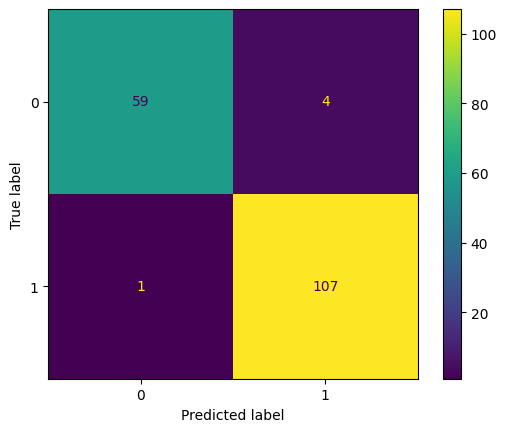

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


pred = rf.predict(X_test)
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

36.Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 0.9532163742690059


 37.Train a Random Forest Classifier and print the top 5 most important features

In [ ]:
import numpy as np

fi = rf.feature_importances_
top5 = np.argsort(fi)[-5:]

print("Top 5 Features:")
for idx in top5:
    print(data.feature_names[idx], fi[idx])


Top 5 Features:
worst radius 0.08416375548378313
worst area 0.11014614686277549
worst concave points 0.11552564712102359
worst perimeter 0.14350975209554184
mean concave points 0.16035614153616565


38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [ ]:
from sklearn.metrics import classification_report

pred = bag.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

In [ ]:
for d in [None, 3, 5, 10]:
    rf = RandomForestClassifier(max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    print("Max Depth:", d, "→ Accuracy:", rf.score(X_test, y_test))


Max Depth: None → Accuracy: 0.9707602339181286
Max Depth: 3 → Accuracy: 0.9707602339181286
Max Depth: 5 → Accuracy: 0.9649122807017544
Max Depth: 10 → Accuracy: 0.9707602339181286


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California Housing dataset for regression
X_reg, y_reg = fetch_california_housing(return_X_y=True)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

models = {
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor()
}

for name, est in models.items():
    reg = BaggingRegressor(estimator=est, n_estimators=30)
    reg.fit(X_train_reg, y_train_reg)
    print(name, "→ MSE:", mean_squared_error(y_test_reg, reg.predict(X_test_reg)))

DecisionTree → MSE: 0.2606356780065329
KNN → MSE: 1.1018848441411782


41.Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score=

In [ ]:
from sklearn.metrics import roc_auc_score

prob = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, prob))


ROC-AUC: 0.9966931216931216


42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bag, X, y, cv=5)
print("CV Scores:", scores)
print("Mean CV Score:", scores.mean())


CV Scores: [0.94736842 0.93859649 0.98245614 0.95614035 0.96460177]
Mean CV Score: 0.9578326346840551


43.Train a Random Forest Classifier and plot the Precision-Recall curve

In [ ]:
from sklearn.metrics import precision_recall_curve

probs = rf.predict_proba(X_test)[:,1]
precision, recall, thresh = precision_recall_curve(y_test, probs)

print("Precision values:", precision)


Precision values: [0.63157895 0.73469388 0.77697842 0.80597015 0.8372093  0.8503937
 0.864      0.87804878 0.8852459  0.89256198 0.9        0.91525424
 0.92307692 0.93103448 0.93913043 0.94736842 0.94690265 0.95535714
 0.96396396 0.96363636 0.97247706 0.98148148 0.98130841 0.98113208
 0.98095238 0.98076923 0.99029126 0.99019608 0.99009901 0.99
 0.98989899 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


44.Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy=

In [ ]:
estimators = [
    ('rf', RandomForestClassifier()),
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)
print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 0.9707602339181286


45.Train a Bagging Regressor with different levels of bootstrap samples and compare performance

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset for regression and define the _b variables
X_b, y_b = fetch_california_housing(return_X_y=True)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=42)

for sample in [0.3, 0.5, 0.7, 1.0]:
    reg = BaggingRegressor(max_samples=sample, random_state=42)
    reg.fit(X_train_b, y_train_b)
    print("Bootstrap", sample, "→ MSE:", mean_squared_error(y_test_b, reg.predict(X_test_b)))

Bootstrap 0.3 → MSE: 0.31342293336380184
Bootstrap 0.5 → MSE: 0.2968519387859436
Bootstrap 0.7 → MSE: 0.2952169775521256
Bootstrap 1.0 → MSE: 0.28623579601385674
